In [6]:
from matplotlib import pyplot as plt
import json
%matplotlib inline

In [7]:
!ls

algo0.py   example.py			   log.txt	  xor_6_0.1.png
algo0.txt  log_4_qbit_from_0.1.txt	   Plot.ipynb
algo1.py   log_6_qbits_from_0.1_start.txt  xor_4_0.1.png


In [8]:
def read_stats(files):
    res = []
    for file_name in files:
        with open(file_name) as f:
            res += json.loads(f.read())
    return res

In [9]:
files = ['log_6_qbits_from_0.1_start.txt', 'log.txt']

stats_6 = read_stats(files)
print(stats_6[:1])

[{'qbits': 6, 'shots': 1024, 'dist': 1, 'delta': 0.1, 'counts': {'1111101': 85, '0100001': 332, '0100101': 21, '1111111': 108, '0100111': 46, '1111100': 16, '0101101': 39, '1110001': 25, '1100011': 2, '0100010': 24, '1110011': 9, '1001001': 3, '1100101': 7, '1100111': 22, '0101111': 15, '1111001': 61, '0010101': 2, '0111111': 11, '0010011': 4, '1001101': 8, '0110100': 1, '1111110': 3, '1101011': 2, '0111001': 26, '1110101': 5, '1100001': 1, '0010001': 18, '0100011': 37, '0111011': 5, '0011101': 5, '1001100': 6, '0101000': 1, '0010111': 2, '0100000': 4, '1001011': 1, '1001111': 8, '0101110': 5, '1010101': 1, '0111000': 1, '1111011': 11, '0110111': 1, '1110000': 4, '0111110': 1, '0101001': 3, '0111010': 2, '1100100': 2, '1111010': 3, '0100100': 5, '1101111': 3, '1110010': 2, '0100110': 2, '0011111': 1, '0101011': 1, '1000001': 2, '1110111': 1, '1100010': 1, '1000101': 1, '0011001': 1, '0011110': 1, '0101010': 1, '0011011': 1, '1010111': 2}}]


In [10]:
def plot_error(stats, cnt, title, baseline):
    correct = ''.zfill(cnt + 1)
    dists = [s['dist'] for s in stats]
    errors = [s['shots'] - (s['counts'][correct] if correct in s['counts'] else 0) for s in stats]
    plt.figure(figsize=(14,10))
    plt.scatter(dists, errors)
    plt.axhline(y=baseline, color='r', linestyle='-')
    plt.title(title)
    plt.xlabel('distance (m, qbits count)')
    plt.ylabel('errors count')

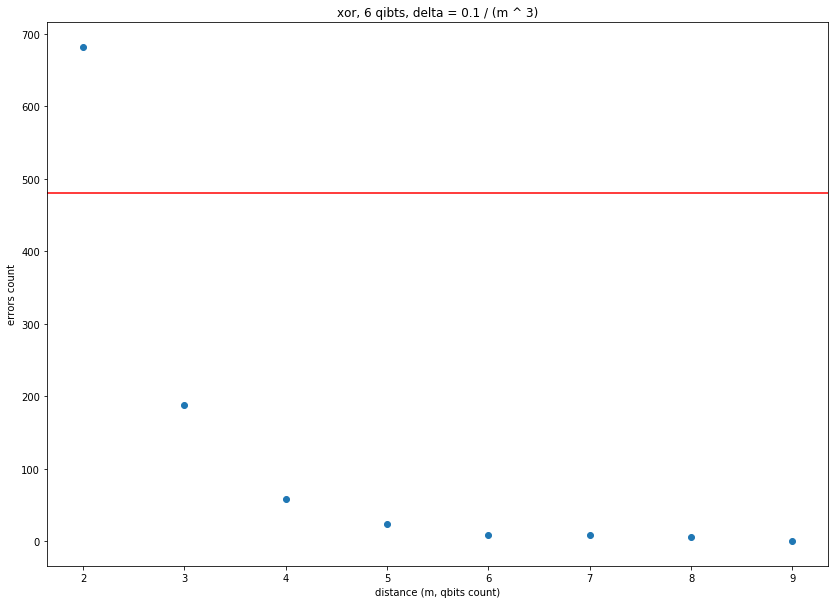

In [11]:
plot_error(stats_6[1:], 6, 'xor, 6 qibts, delta = 0.1 / (m ^ 3)', 480)

In [13]:
stats_4 = read_stats(['log_4_qbit_from_0.1.txt'])
print(stats_4[:2])

[{'qbits': 4, 'shots': 1024, 'dist': 1, 'counts': {'01100': 90, '00011': 85, '00101': 118, '01111': 115, '01001': 148, '10010': 8, '00110': 74, '11111': 32, '10101': 15, '00000': 72, '11101': 13, '10011': 18, '11000': 9, '01010': 110, '10000': 17, '11110': 9, '10110': 12, '11100': 12, '11011': 10, '10111': 6, '10100': 6, '10001': 4, '11001': 22, '11010': 14, '00100': 1, '00010': 1, '01011': 2, '01101': 1}}, {'qbits': 4, 'shots': 1024, 'dist': 2, 'counts': {'00000': 892, '10110': 12, '00011': 43, '00110': 34, '01100': 36, '01111': 3, '00101': 1, '10100': 3}}]


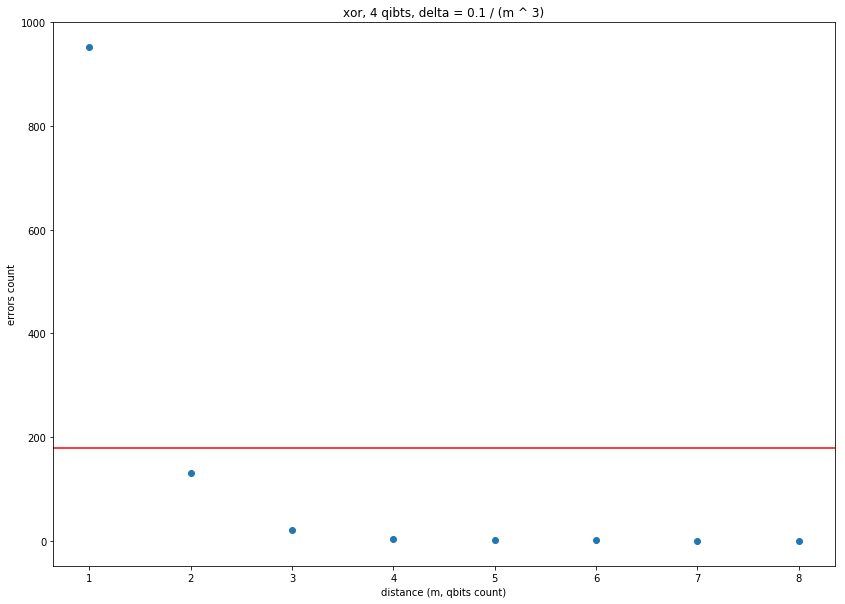

In [14]:
plot_error(stats_4, 4, 'xor, 4 qibts, delta = 0.1 / (m ^ 3)', 180)